## Why I Chose These Business Problems and Datasets to Work on in This Project:
#### 1. Real-World Application: The project is based on real-world data, making it relevant and practical.

#### 2. Data Complexity: The datasets include both numerical and categorical features, enabling practice in data preprocessing techniques such as encoding and scaling.

#### 3. Feature Engineering Opportunities: There are opportunities for feature extraction, selection, and transformation, which are key steps in building effective machine learning models.
#### 4.  Scalability and Performance: The presence of smaller and larger datasets allows for testing the scalability and performance of different machine learning models.
#### 5.  Model Training and Evaluation: The project can cover a range of classification algorithms (e.g., Logistic Regression, Decision Trees, SVM).
#### It includes model evaluation using metrics such as accuracy and precision.

# Step No.1: Business Problem Understanding
## Problem Statement:
#### The project aims to predict whether a client will subscribe to a term deposit based on various attributes collected from previous marketing campaigns. The goal is to improve the efficiency and success rates of the bank's telemarketing campaigns by identifying potential clients who are more likely to subscribe to term deposits.
## Formulating it as a DS/ML Task
#### Machine Learning Task: This is a binary classification problem where the target variable is whether a client will subscribe to a term deposit (yes/no). I will use supervised learning techniques to train models that can predict this outcome based on the provided features.

# Step No.2: Data Collection
#### I use the dataset "bank-additional-full.csv" from "https://www.kaggle.com/datasets/tunguz/bank-marketing-data-set/data?select=bank-additional-full.csv", which contains all examples and 20 input features, making it the most comprehensive version of the dataset related to the telemarketing campaigns

## Imports


In [828]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



### Load Dataset

In [829]:
df = pd.read_csv("https://raw.githubusercontent.com/EhsanShahabiRad/MachineLearning-Bank-Marketing/main/Datasets/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Step No.3: Data Exploration

#### Check for missing values

In [830]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Check for duplicate entries

In [831]:
print(df.duplicated().sum())

12


#### Check for class imbalance


In [832]:
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


#### Visualize the distribution of the target variable

<Axes: >

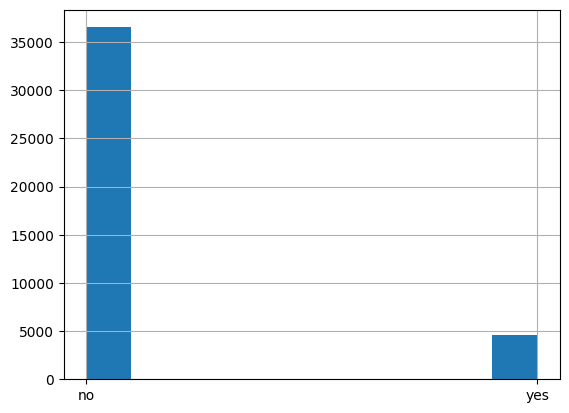

In [833]:
df["y"].hist()

#### Visualize the distribution of the 'duration' feature

<Axes: >

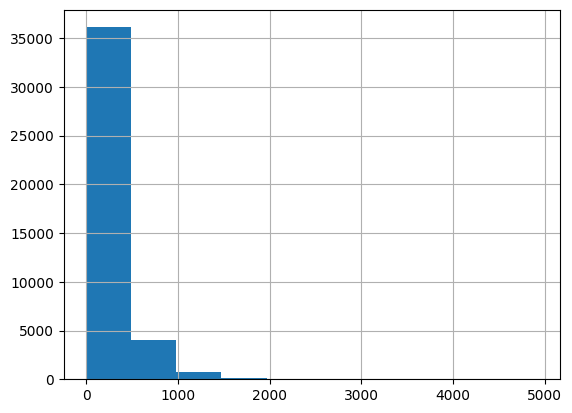

In [834]:
df["duration"].hist()

#### Visualize the distribution of the 'day_of_week' feature

<Axes: >

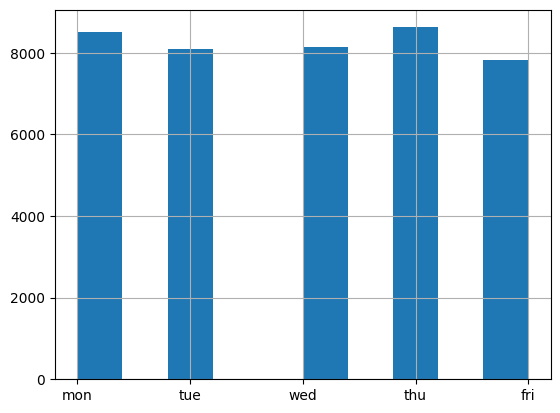

In [835]:
df["day_of_week"].hist()

#### Visualize the distribution of the 'contact' feature

<Axes: >

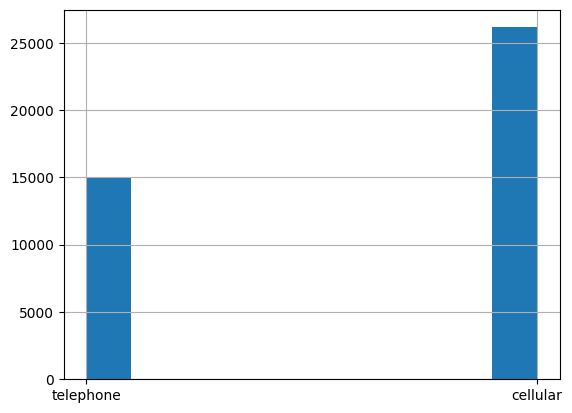

In [836]:
df["contact"].hist()

#### Visualize the distribution of numerical features

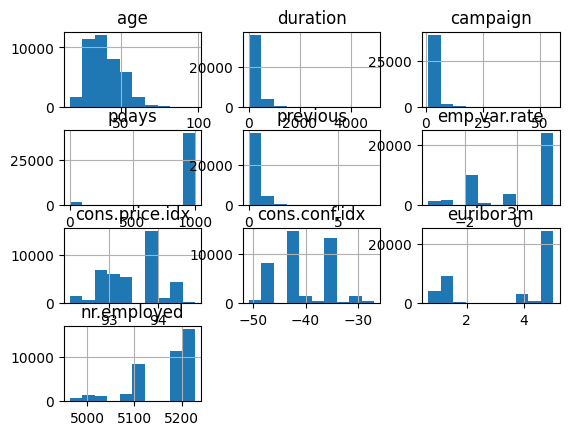

In [837]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist()
plt.show()

# Step No.4: Data Preprocessing

#### remove duplicate entries. although there are only 12 duplicate values, i decided to remove them

In [838]:
print("Number of duplicate entries before dropping:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate entries after dropping:", df.duplicated().sum())

Number of duplicate entries before dropping: 12
Number of duplicate entries after dropping: 0


#### Drop the 'duration' and 'day_of_week' columns as they are not useful. Although it might seems that the contact feature is relevant, after droping it, the results slightly got better 

In [839]:
df = df.drop(columns=['duration', 'day_of_week', 'contact'])

#### Identify categorical and numerical feature

In [840]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

#### Split the data into features and target; Also, Convert target to binary

In [841]:
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

#### Address class imbalance using resampling

In [842]:
df_majority = df[y == 0]
df_minority = df[y == 1]

df_minority_upsampled = df_minority.sample(len(df_majority), replace=True, random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#### Split the upsampled data into features and target

In [843]:
X_resampled = df_upsampled.drop('y', axis=1)
y_resampled = df_upsampled['y'].apply(lambda x: 1 if x == 'yes' else 0)

#### Shuffle the dataset


In [844]:
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=33)

### Split the resampled data into training and test sets

In [845]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=33)
# i'm usin random_state=33 so i always get the same training and test set everytime i run the code. it can be removed, also the number can set to any number

# Step No.5: Feature Engineering

#### Identify categorical and numerical features

In [846]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

#### Applying Transformations 

In [847]:
ct = ColumnTransformer([
    ("standard_scaling", StandardScaler(), numerical_features),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

#### Fitting and Transforming the Training Data

In [848]:
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

#### Display shapes of the preprocessed datasets

In [849]:
print("Training Set Shape:", X_train_processed.shape, y_train.shape)
print("Test Set Shape:", X_test_processed.shape, y_test.shape)

Training Set Shape: (58459, 55) (58459,)
Test Set Shape: (14615, 55) (14615,)


# Step No.6: Model Training

## Algorithm Selection

#### I'll start with Logistic Regression and then proceed to other models to see the end result of every sigle one separetly. I'll use default hyperparameters for the initial training. Later, I change hyperparameters to see if I can make better results or not

### Initialize the model

In [850]:
model = LogisticRegression(solver='liblinear')

### Train the model on the training set

In [851]:
model.fit(X_train_processed, y_train)

LogisticRegression(solver='liblinear')

#### Predict on the test set

In [852]:
y_pred = model.predict(X_test_processed)

#### Calculate evaluation metrics

In [853]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7378036264112213
Precision: 0.8153403987785163
Recall: 0.6181397249080757


### make change on Hyperparameters

In [854]:
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_processed)

print("\nAfter changing Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))



After changing Hyperparameters:
Accuracy: 0.7379404721176873
Precision: 0.815633423180593
Recall: 0.6181397249080757


## Adding Decision Tree as the second algorithm

### Train the Decision Tree model with default parameters

In [855]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_processed, y_train)
y_pred_tree = tree_model.predict(X_test_processed)

print("\nDecision Tree - Default Parameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))


Decision Tree - Default Parameters:
Accuracy: 0.9412931919261033
Precision: 0.8970246112403575
Recall: 0.9976848699441645


#### change Hyperparameters for Decision Tree

In [856]:
param_grid_tree = {'max_depth': [5, 10], 'min_samples_split': [2, 5]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_search_tree.fit(X_train_processed, y_train)                                                                    
tuned_tree_model = grid_search_tree.best_estimator_
y_pred_tree_best = tuned_tree_model.predict(X_test_processed)

print("\nDecision Tree - After changing Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_best))
print("Precision:", precision_score(y_test, y_pred_tree_best))
print("Recall:", recall_score(y_test, y_pred_tree_best))


Decision Tree - After changing Hyperparameters:
Accuracy: 0.7619568936024632
Precision: 0.8434056167792392
Recall: 0.6461936538199646


## Adding Random Forest as the third algorithm

#### Initialize the Random Forest model

In [857]:
rf_model = RandomForestClassifier()

#### Train the model on the processed training data

In [858]:
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier()

#### Predict the test set using the trained Random Forest model

In [859]:
y_pred_rf = rf_model.predict(X_test_processed)

#### Calculate accuracy, precision, and recall for Random Forest model

In [860]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("\nRandom Forest - Default Parameters:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)


Random Forest - Default Parameters:
Accuracy: 0.9613410879233664
Precision: 0.9301853262249302
Recall: 0.9979572381860276


#### change Hyperparameters for Random Forest

In [861]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10]}

#### Grid Search with cross-validation

In [862]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_processed, y_train)

tuned_rf_model = grid_search_rf.best_estimator_

#### Predict the test set with Changed Hyperparameters

In [863]:
y_pred_rf_best = tuned_rf_model.predict(X_test_processed)

print("\nRandom Forest - After changing Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best))
print("Recall:", recall_score(y_test, y_pred_rf_best))


Random Forest - After changing Hyperparameters:
Accuracy: 0.7518303113239823
Precision: 0.8392987582176772
Recall: 0.6259022198011712


# Step No.7: Model Evaluation

In [864]:
print("---------Comparison of Algorithms:---------\n")

# Logistic Regression - Before Tuning
accuracy_logistic = accuracy_score(y_test, y_pred)
precision_logistic = precision_score(y_test, y_pred)
recall_logistic = recall_score(y_test, y_pred)
print("Logistic Regression - Before changing Hyperparameters:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("---------")

# Logistic Regression - After Tuning
accuracy_logistic_best = accuracy_score(y_test, y_pred_best)
precision_logistic_best = precision_score(y_test, y_pred_best)
recall_logistic_best = recall_score(y_test, y_pred_best)
print("Logistic Regression - After changing Hyperparameters:")
print("Accuracy:", accuracy_logistic_best)
print("Precision:", precision_logistic_best)
print("Recall:", recall_logistic_best)
print("---------")

# Decision Tree - Before Tuning
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
print("\nDecision Tree - Before changing Hyperparameters:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("---------")

# Decision Tree - After Tuning
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
precision_tree_best = precision_score(y_test, y_pred_tree_best)
recall_tree_best = recall_score(y_test, y_pred_tree_best)
print("Decision Tree - After changing Hyperparameters:")
print("Accuracy:", accuracy_tree_best)
print("Precision:", precision_tree_best)
print("Recall:", recall_tree_best)
print("---------")

# Random Forest - Before Tuning
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("\nRandom Forest - Before changing Hyperparameters:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("---------")

# Random Forest - After Tuning
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
print("Random Forest - After changing Hyperparameters:")
print("Accuracy:", accuracy_rf_best)
print("Precision:", precision_rf_best)
print("Recall:", recall_rf_best)

---------Comparison of Algorithms:---------

Logistic Regression - Before changing Hyperparameters:
Accuracy: 0.7378036264112213
Precision: 0.8153403987785163
Recall: 0.6181397249080757
---------
Logistic Regression - After changing Hyperparameters:
Accuracy: 0.7379404721176873
Precision: 0.815633423180593
Recall: 0.6181397249080757
---------

Decision Tree - Before changing Hyperparameters:
Accuracy: 0.9412931919261033
Precision: 0.8970246112403575
Recall: 0.9976848699441645
---------
Decision Tree - After changing Hyperparameters:
Accuracy: 0.7619568936024632
Precision: 0.8434056167792392
Recall: 0.6461936538199646
---------

Random Forest - Before changing Hyperparameters:
Accuracy: 0.9613410879233664
Precision: 0.9301853262249302
Recall: 0.9979572381860276
---------
Random Forest - After changing Hyperparameters:
Accuracy: 0.7518303113239823
Precision: 0.8392987582176772
Recall: 0.6259022198011712
